In [103]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('TSLA.csv')

In [104]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.sort_index(inplace=True)


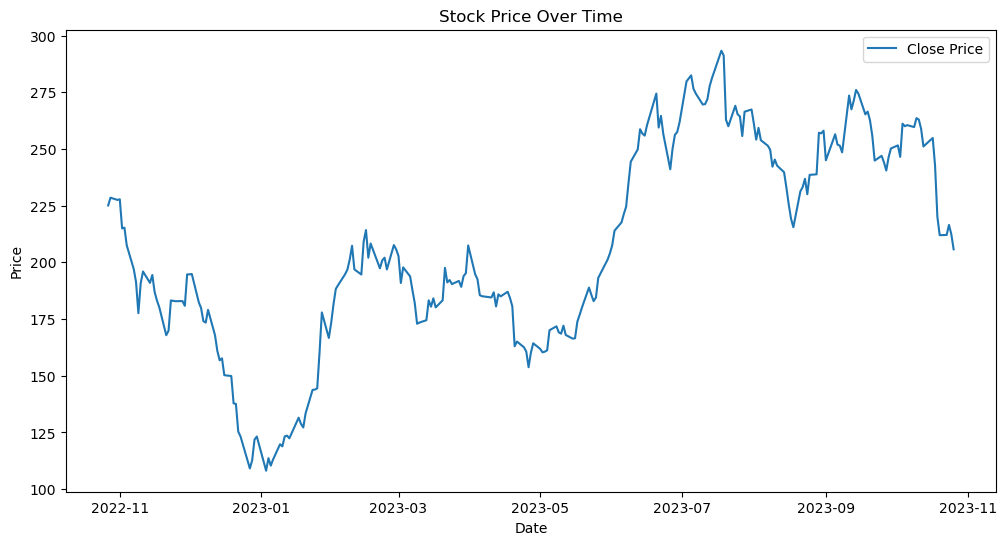

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   206.862271  211.294940  202.193068  206.823147  206.823147   
std     44.892457   45.259833   44.584485   44.934633   44.934633   
min    103.000000  111.750000  101.809998  108.099998  108.099998   
25%    176.635002  182.419998  172.504998  178.474998  178.474998   
50%    198.539993  203.000000  192.889999  197.580002  197.580002   
75%    249.385002  255.080001  244.464996  250.215004  250.215004   
max    296.040009  299.290009  289.519989  293.339996  293.339996   

             Volume  
count  2.510000e+02  
mean   1.356857e+08  
std    4.049085e+07  
min    5.067270e+07  
25%    1.075573e+08  
50%    1.282597e+08  
75%    1.610392e+08  
max    3.065906e+08  


In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

missing_values = df.isnull().sum()
print(missing_values)

statistics = df.describe()
print(statistics)


In [107]:
X = pd.DataFrame(df['High'])
y = pd.DataFrame(df['Low'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

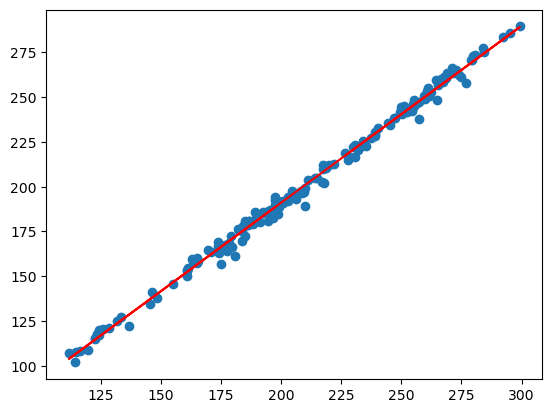

MSE = 9.86124588475108


In [109]:
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

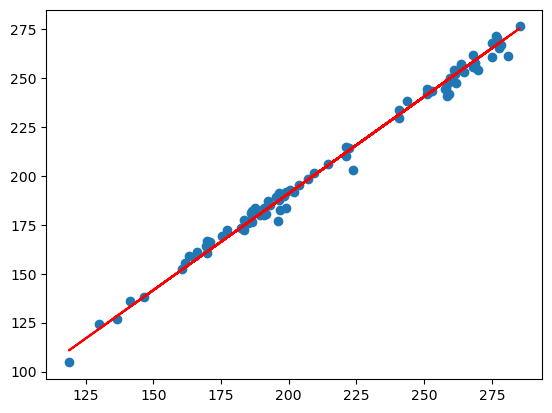

MSE = 13.185754778857836


In [110]:
Y_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

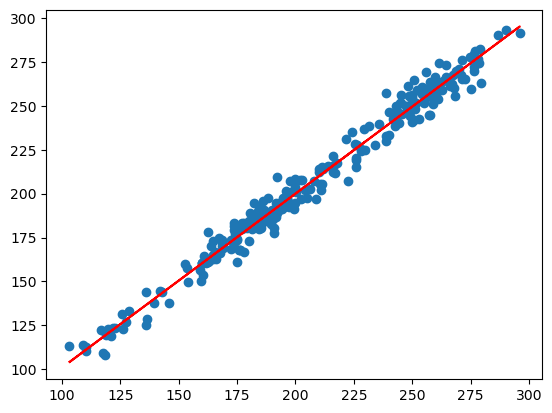

MSE = 37.2880071881282


In [111]:
df['Result'] = df['High']*df['Close']

X = pd.DataFrame(df['Open'])
Y = pd.DataFrame(df['Close'])
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))